# Set up

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.weightstats import DescrStatsW

%matplotlib inline

In [338]:
sns.set_style("ticks",
             rc = {'axes.grid' : False,
                  'grid.linestyle' : 'dashed'})

sns.set_context('poster')
sns.set_palette("Set2")

# Reading and preparing data

In [3]:
df_full = pd.read_pickle('./output/base_plikHM_TTTEEE_lowTEB_lp.pkl')
df_full = df_full.reindex(np.arange(len(df_full)))

In [405]:
df_param_names = pd.read_pickle('./input/param_names.pkl')

In [4]:
params = ['cf_peak', 'cf_dip', 'lp','omegabh2', 'omegach2', 'H0*', 'tau', 'A*', 'ns', 'rdrag*']
df = df_full[params].copy()
df.loc[:,'lp'] = df_full.loc[:,'lp']/(df_full.loc[:,'H0*']/100)
df.loc[:,'cf_peak'] = df_full.loc[:,'cf_peak']/(df_full.loc[:,'H0*']/100)
df.loc[:,'cf_dip'] = df_full.loc[:,'cf_dip']/(df_full.loc[:,'H0*']/100)

In [168]:
params_lp = ['cf_peak', 'cf_dip', 'lp','rdrag*']
params_clean = ['lp','omegabh2', 'omegach2', 'H0*', 'tau', 'A*', 'ns']

# Functions and parameters for plotting

In [296]:
cmap = sns.cubehelix_palette(light=1, dark=0, as_cmap=True,rot=-0.3, hue=1)
hist_color = sns.cubehelix_palette(light=1, dark=0,rot=-0.3, hue=1)[-3]

In [297]:
def plot_hist2d(*args, color = None, **kwargs):
    return plt.hist2d(*args, **kwargs)[3]

In [346]:
def plot_hist(ax, arr, weights, color=hist_color, bins=50):
    stats = DescrStatsW(arr,weights=weights)
    mean = np.round(stats.mean,2)
    std = np.round(stats.std,2)
    ax.hist(arr, bins = bins, weights=weights, color=color,
        histtype='stepfilled', normed = True)
    ax.set_ylabel('Frequency')
    ax.set_title(r'best-fit = {} $\pm$ {}'.format(mean,std),
         fontsize=15)

In [382]:
def plot_matrix(df, params, size = 3 , hspace=0.05, wspace=0.05):
    ax = sns.PairGrid(df[params], size=size, aspect=1)
    ax.map_offdiag(plot_hist2d, bins = 40, weights=df_full['weight'],
                  cmap=cmap)
    ax.map_diag(plt.hist, histtype='stepfilled', bins=40,
                color=hist_color,weights=df_full['weight'])    
    plt.subplots_adjust(hspace=hspace, wspace=wspace)
    return ax

In [299]:
# from scipy.interpolate import CubicSpline
# # function to get ML and 1 sigma intervals
# arr = df['lp'].values
# weights = df_full['weight'].values
# nbins = 40
# hist, edge = np.histogram(arr, bins = nbins, weights=weights, density=True)
# edge_central = edge[1:] - (edge[1] - edge[0])/2
# pdf = CubicSpline(edge_central,hist)

# Plotting 

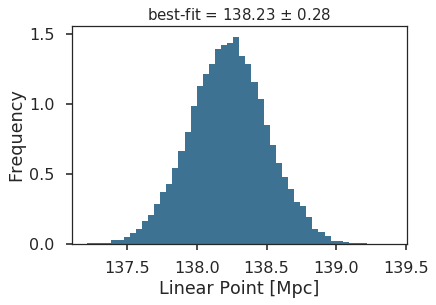

In [344]:
fig, ax = plt.subplots()

arr = df['lp'].values
weights = df_full['weight'].values

plot_hist(ax,arr,weights)


ax.set_xlabel('Linear Point [Mpc]')

plt.savefig('./Figures/lp_dist.pdf', bbox_inches='tight',
            transparent=True)

plt.show()

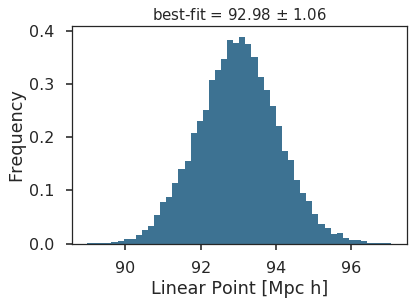

In [345]:
fig, ax = plt.subplots()

arr = df_full['lp'].values
weights = df_full['weight'].values

plot_hist(ax,arr,weights)


ax.set_xlabel('Linear Point [Mpc h]')

plt.savefig('./Figures/lp_h_dist.pdf', bbox_inches='tight',
            transparent=True)

plt.show()

In [408]:
df_param_names.loc['H0*']

latex    H_0 
Name: H0*, dtype: object

In [403]:
g.axes[3,0].yaxis.get_label_text()

'rdrag*'

In [430]:
labels = [r'$r_{\rm peak}$ [Mpc]',
          r'$r_{\rm dip}$ [Mpc]',
          r'$r_{\rm lp}$ [Mpc]',
          r'$r_{\rm drag}$ [Mpc]']

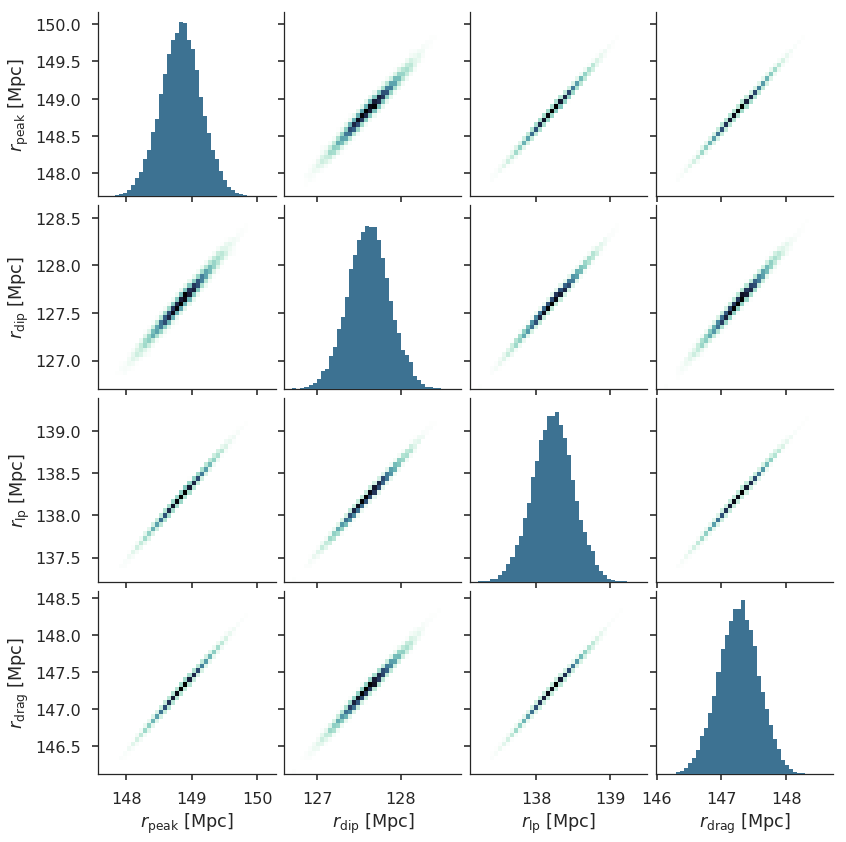

In [417]:
g = plot_matrix(df,params_lp)
xlabels,ylabels = [],[]

for i in range(len(labels)):
    g.axes[i,0].yaxis.set_label_text(labels[i])
    g.axes[-1,i].xaxis.set_label_text(labels[i])
plt.savefig('./Figures/lp_cf_rdrag_matrix.pdf', bbox_inches='tight',
            transparent=True)
plt.show()

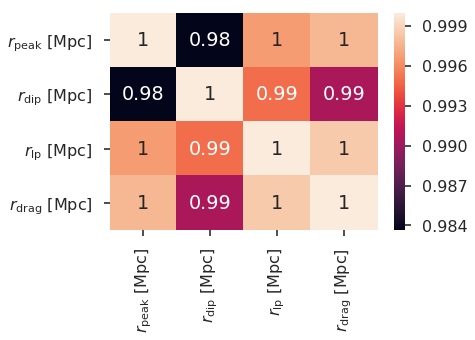

In [433]:
sns.heatmap(df[params_lp].corr(),annot=True, robust=True,
            xticklabels=labels, yticklabels=labels)
plt.yticks(rotation='horizontal')
plt.savefig('./Figures/lp_cf_rdrag_corr.pdf', bbox_inches='tight',
            transparent=True)
plt.show()

In [434]:
labels = [ r'$r_{\rm lp}$ [Mpc]',
         r'$\Omega_b h^2$',
         r'$\Omega_c h^2$',
         r'$H_0$',
         r'$\tau$',
         r'$A$',
         r'$n_s$']

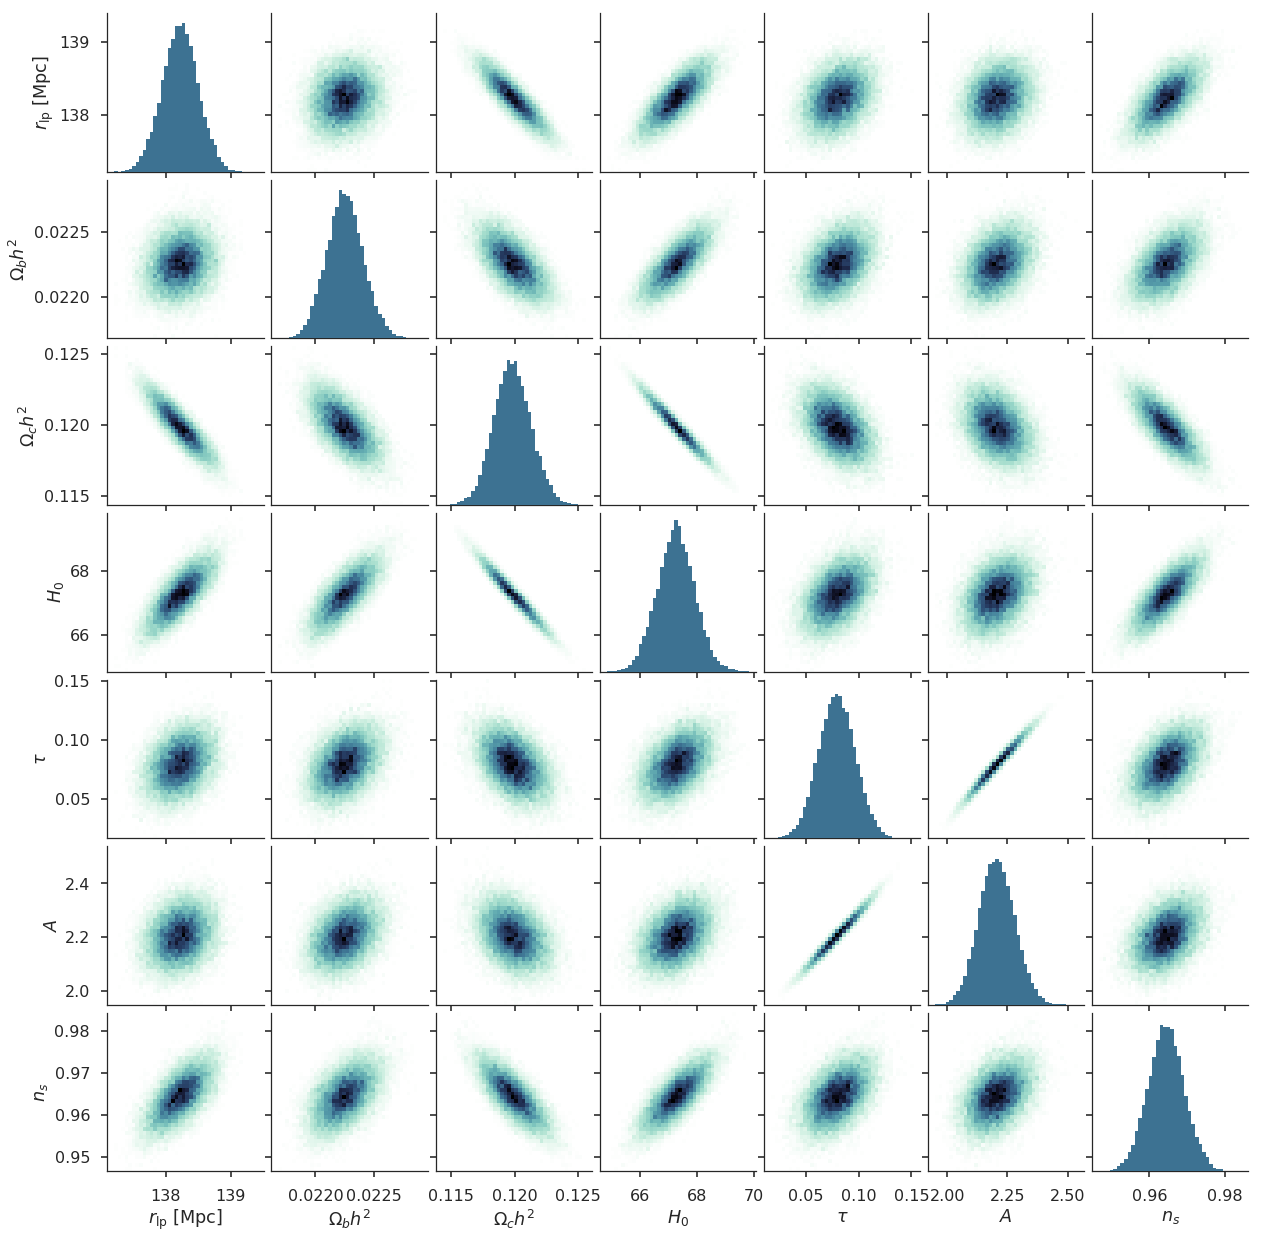

In [428]:
g = plot_matrix(df,params_clean, size = 2.5)

for i in range(len(labels)):
    g.axes[i,0].yaxis.set_label_text(labels[i])
    g.axes[-1,i].xaxis.set_label_text(labels[i])
    
plt.savefig('./Figures/lp_cosmo_matrix.pdf', bbox_inches='tight',
            transparent=True)
plt.show()

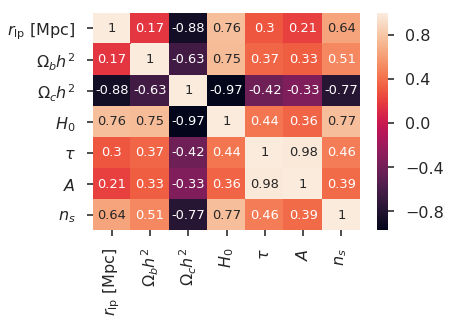

In [438]:
sns.heatmap(df[params_clean].corr(),annot=True, robust=True,
           annot_kws=dict(fontsize=13),
           xticklabels=labels, yticklabels=labels)#, cmap=cmap)
plt.yticks(rotation='horizontal')

plt.savefig('./Figures/lp_cosmo_corr.pdf', bbox_inches='tight',
            transparent=True)
plt.show()